# dominant color extarction

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import cv2
im=cv2.imread('rafael-nadal-networth.jpg')
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
print(im.shape)
original_shape=im.shape
#this below command causes problem inj k-means
#cv2.imshow("image",im)

(720, 1280, 3)


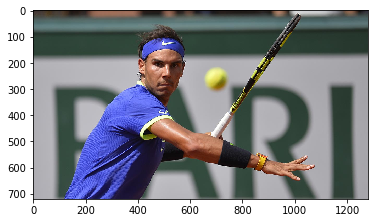

In [3]:
plt.imshow(im)

In [4]:
all_pixels=im.reshape((720*1280,3))
print(all_pixels.shape)

(921600, 3)


In [5]:
from sklearn.cluster import KMeans

In [6]:
dominant_colors=4
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
km.cluster_centers_

array([[111.95810614, 112.87028983, 105.6436026 ],
       [178.24423992, 174.08000525, 174.99928951],
       [ 47.98952126,  57.23372411,  53.54371878],
       [ 86.38214816,  97.22936097, 221.89531649]])

In [8]:
#these are the centers through which dominant color is associated
centers=km.cluster_centers_
centers=np.array(centers,dtype='uint8')

In [9]:
print(centers)

[[111 112 105]
 [178 174 174]
 [ 47  57  53]
 [ 86  97 221]]


# plot what all colors are these


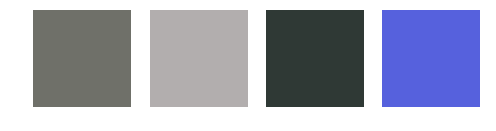

In [10]:
i=1
plt.figure(0,figsize=(8,2))
color=[]
for each_col in centers:
    #to show the every dominant color differently
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    color.append(each_col)
    
    #color swatch
    #filling the particular dominant color in a
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()


In [11]:
print(color)

[array([111, 112, 105], dtype=uint8), array([178, 174, 174], dtype=uint8), array([47, 57, 53], dtype=uint8), array([ 86,  97, 221], dtype=uint8)]


# segmenting our original image

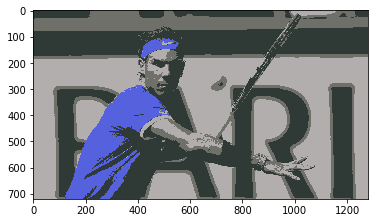

In [12]:
new_img=np.zeros((720*1280,3),dtype='uint8')
for ix in range(new_img.shape[0]):
    #making comparision with each dominant coloraand filling with respective color predicted by k_means.labels
    new_img[ix]=color[km.labels_[ix]]
new_img=new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

In [13]:
#in segmenting of our image we have to form our image using dominant color extarction